In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv(R'C:\Users\baoch\OneDrive\12. DATA ANALYST\KHOA 2 - BI\15. FINAL PROJECT\DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS\DataCoSupplyChainDataset.csv',encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
df.apply(lambda x : x.nunique())

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [40]:
## Convert all date columns to datetime type
df['order date (DateOrders)'] = df['order date (DateOrders)'].str.split(" ", expand=True)[0]
df['shipping date (DateOrders)'] =df['shipping date (DateOrders)'].str.split(" ",expand=True)[0]
df[['order date (DateOrders)','shipping date (DateOrders)']]

## Delete columns that consist of no values  Product Description, Customer Email, Customer Password, Customer Country
df = df.drop(columns=['Product Description','Customer Email','Customer Password','Customer Country'])  ## another way" df = df.dropna(axis=1, how='all')

## As we have exactly order city where the shipment is delivered, we don't need order zipcode
### therefore we decide to delete this column. 
df = df.drop(columns = ['Order Zipcode'])

## Fill in  Customer Lname, Customer Zipcode 
df['Customer Lname'] = df['Customer Lname'].fillna(value = "No Lname")

## Check the Customer City to fillna in Customer Zipcode
df[df['Customer Zipcode'].isnull()] ['Customer City'] ## Kết quả trả ra toàn bộ zipcode N/A là CA
## Fillna in Customer Zipcode
df ['Customer Zipcode'] = df ['Customer Zipcode'] .fillna(value='95758')

## Change the number in Customer State to right location
df['Customer State'] = df['Customer State'].replace(['95758','91732'],'CA')
# df['Customer Zipcode'] = df['Customer Zipcode'].replace({'95758':'CA','91732':'CA'})

## Change all space in columns to underscore (_)
df.columns = df.columns.str.replace(' ', '_')

# Convert IDs and other categorical features to integers or strings as appropriate
columns_to_convert = ['Category_Id', 'Customer_Id', 'Department_Id', 'Order_Customer_Id', 'Order_Id',
                      'Order_Item_Cardprod_Id', 'Customer_Zipcode', 'Product_Card_Id', 'Product_Category_Id']

for column in columns_to_convert:
    df[column] = df[column].astype('int')
    
## Due to days in delivery = 0, as always shipping mode is same day, so we change the shipping mode 
df['Shipping_Mode'] = df['Shipping_Mode'].str.replace("Same Day","Priority")

## Delete rows where the value in the "Delivery_Status" column is "Shipping canceled",
## and the payment type column has the signal of 'SUSPECTED_FRAUD' or 'CANCELED'
df = df.drop(df[df['Delivery_Status'] =='Shipping canceled'].index)
## Change the Order Country in Spanish to English
translation_dict = {
    'Indonesia': 'Indonesia', 'India': 'India', 'Australia': 'Australia', 'China': 'China', 
    'Corea del Sur': 'South Korea', 'Singapur': 'Singapore', 'Turquía': 'Turkey', 
    'Mongolia': 'Mongolia', 'Estados Unidos': 'United States', 'Nigeria': 'Nigeria', 
    'República Democrática del Congo': 'Democratic Republic of the Congo', 'Senegal': 'Senegal', 
    'Marruecos': 'Morocco', 'Alemania': 'Germany', 'Francia': 'France', 'Países Bajos': 'Netherlands', 
    'Reino Unido': 'United Kingdom', 'Guatemala': 'Guatemala', 'El Salvador': 'El Salvador', 
    'Panamá': 'Panama', 'República Dominicana': 'Dominican Republic', 'Venezuela': 'Venezuela', 
    'Colombia': 'Colombia', 'Honduras': 'Honduras', 'Brasil': 'Brazil', 'México': 'Mexico', 
    'Uruguay': 'Uruguay', 'Argentina': 'Argentina', 'Cuba': 'Cuba', 'Perú': 'Peru', 
    'Nicaragua': 'Nicaragua', 'Ecuador': 'Ecuador', 'Angola': 'Angola', 'Sudán': 'Sudan', 
    'Somalia': 'Somalia', 'Costa de Marfil': 'Ivory Coast', 'Egipto': 'Egypt', 'Italia': 'Italy', 
    'España': 'Spain', 'Suecia': 'Sweden', 'Austria': 'Austria', 'Zambia': 'Zambia', 'Níger': 'Niger', 
    'SudAfrica': 'South Africa', 'Mozambique': 'Mozambique', 'Tanzania': 'Tanzania', 
    'Ruanda': 'Rwanda', 'Israel': 'Israel', 'Nueva Zelanda': 'New Zealand', 'Bangladés': 'Bangladesh', 
    'Tailandia': 'Thailand', 'Irak': 'Iraq', 'Arabia Saudí': 'Saudi Arabia', 'Filipinas': 'Philippines', 
    'Kazajistán': 'Kazakhstan', 'Irán': 'Iran', 'Myanmar (Birmania)': 'Myanmar (Burma)', 
    'Uzbekistán': 'Uzbekistan', 'Benín': 'Benin', 'Camerún': 'Cameroon', 'Kenia': 'Kenya', 
    'Togo': 'Togo', 'Madagascar': 'Madagascar', 'Argelia': 'Algeria', 'Ucrania': 'Ukraine', 
    'Polonia': 'Poland', 'Portugal': 'Portugal', 'Rumania': 'Romania', 'Trinidad y Tobago': 'Trinidad and Tobago', 
    'Afganistán': 'Afghanistan', 'Japón': 'Japan', 'Pakistán': 'Pakistan', 'Vietnam': 'Vietnam', 
    'Malasia': 'Malaysia', 'Finlandia': 'Finland', 'Rusia': 'Russia', 'Irlanda': 'Ireland', 
    'Noruega': 'Norway', 'Eslovaquia': 'Slovakia', 'Bélgica': 'Belgium', 'Bolivia': 'Bolivia', 
    'Chile': 'Chile', 'Jamaica': 'Jamaica', 'Yemen': 'Yemen', 'Ghana': 'Ghana', 'Kirguistán': 'Kyrgyzstan', 
    'Georgia': 'Georgia', 'Nepal': 'Nepal', 'Emiratos Árabes Unidos': 'United Arab Emirates', 
    'Camboya': 'Cambodia', 'Uganda': 'Uganda', 'Lesoto': 'Lesotho', 'Lituania': 'Lithuania', 
    'Suiza': 'Switzerland', 'Hungría': 'Hungary', 'Dinamarca': 'Denmark', 'Haití': 'Haiti', 
    'Bielorrusia': 'Belarus', 'Croacia': 'Croatia', 'Laos': 'Laos', 'Baréin': 'Bahrain', 
    'Canada': 'Canada', 'Macedonia': 'Macedonia', 'Bulgaria': 'Bulgaria', 'República Checa': 'Czech Republic', 
    'Sri Lanka': 'Sri Lanka', 'Zimbabue': 'Zimbabwe', 'Eritrea': 'Eritrea', 'Burkina Faso': 'Burkina Faso', 
    'Costa Rica': 'Costa Rica', 'Libia': 'Libya', 'Barbados': 'Barbados', 'Tayikistán': 'Tajikistan', 
    'Siria': 'Syria', 'Guadalupe': 'Guadeloupe', 'Papúa Nueva Guinea': 'Papua New Guinea', 
    'Azerbaiyán': 'Azerbaijan', 'Turkmenistán': 'Turkmenistan', 'Paraguay': 'Paraguay', 'Jordania': 'Jordan', 
    'Hong Kong': 'Hong Kong', 'Guinea': 'Guinea', 'Martinica': 'Martinique', 'Moldavia': 'Moldova', 
    'Qatar': 'Qatar', 'Etiopía': 'Ethiopia', 'Mali': 'Mali', 'Albania': 'Albania', 
    'República del Congo': 'Republic of the Congo', 'Bosnia y Herzegovina': 'Bosnia and Herzegovina', 
    'Omán': 'Oman', 'Túnez': 'Tunisia', 'Sierra Leona': 'Sierra Leone', 'Yibuti': 'Djibouti', 
    'Burundi': 'Burundi', 'Montenegro': 'Montenegro', 'Gabón': 'Gabon', 'Sudán del Sur': 'South Sudan', 
    'Luxemburgo': 'Luxembourg', 'Liberia': 'Liberia', 'Namibia': 'Namibia', 'Mauritania': 'Mauritania', 
    'Grecia': 'Greece', 'Suazilandia': 'Eswatini', 'Guyana': 'Guyana', 'Guayana Francesa': 'French Guiana', 
    'República Centroafricana': 'Central African Republic', 'Taiwán': 'Taiwan', 'Estonia': 'Estonia', 
    'Líbano': 'Lebanon', 'Chipre': 'Cyprus', 'Guinea-Bissau': 'Guinea-Bissau', 'Surinam': 'Suriname', 
    'Belice': 'Belize', 'Eslovenia': 'Slovenia', 'República de Gambia': 'Republic of the Gambia', 
    'Botsuana': 'Botswana', 'Armenia': 'Armenia', 'Guinea Ecuatorial': 'Equatorial Guinea', 
    'Kuwait': 'Kuwait', 'Bután': 'Bhutan', 'Chad': 'Chad', 'Serbia': 'Serbia','Sáhara Occidental': 'Western Sahara'}
df['Order_Country'] = df['Order_Country'].map(translation_dict)


In [6]:
## Check the Order_Item_Product_Price column is the same as Product_Price columns
df['a'] = df['Order_Item_Product_Price'] == df['Product_Price']
df[df['a'] == False]
## Result: Order_Item_Product_Price column is the same as Product_Price columns
df = df.drop(columns = ['a'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172765 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           172765 non-null  object 
 1   Days_for_shipping_(real)       172765 non-null  int64  
 2   Days_for_shipment_(scheduled)  172765 non-null  int64  
 3   Benefit_per_order              172765 non-null  float64
 4   Sales_per_customer             172765 non-null  float64
 5   Delivery_Status                172765 non-null  object 
 6   Late_delivery_risk             172765 non-null  int64  
 7   Category_Id                    172765 non-null  int32  
 8   Category_Name                  172765 non-null  object 
 9   Customer_City                  172765 non-null  object 
 10  Customer_Fname                 172765 non-null  object 
 11  Customer_Id                    172765 non-null  int32  
 12  Customer_Lname                 1727

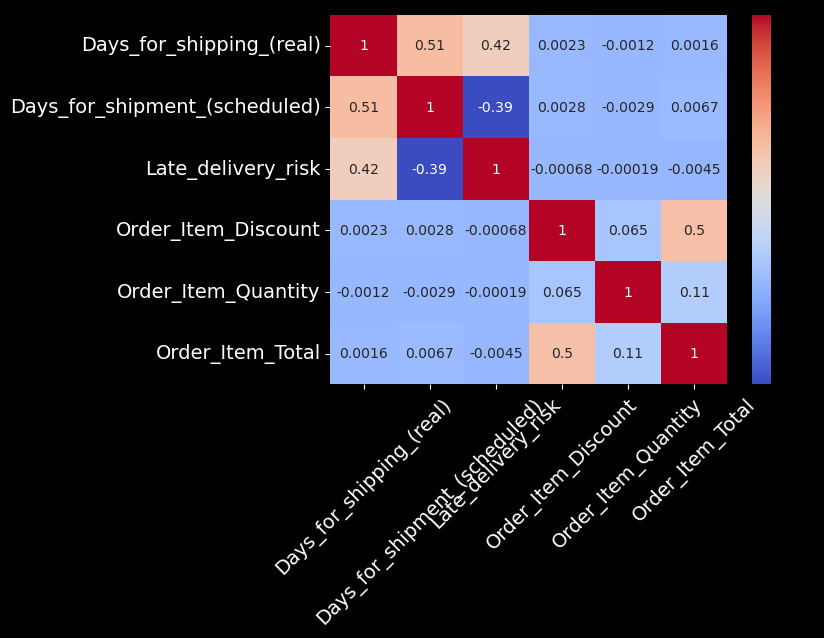

In [8]:
## Check the correlation between delivery days, late_risk, total_quantity, discount rate
correlation = df[['Days_for_shipping_(real)','Days_for_shipment_(scheduled)', 'Late_delivery_risk','Order_Item_Discount','Order_Item_Quantity','Order_Item_Total']].corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True)
plt.gca().tick_params(axis='x', colors='white', labelsize=14,rotation=45)
plt.gca().tick_params(axis='y', colors='white', labelsize=14)
plt.gca().yaxis.label.set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gcf().patch.set_facecolor('black')

In [9]:
for i in df.columns:
    print (i)
    print (df[i].unique())
    print ('xxxx-------xxxx-------xxxxx')

Type
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
xxxx-------xxxx-------xxxxx
Days_for_shipping_(real)
[3 5 4 2 0 6 1]
xxxx-------xxxx-------xxxxx
Days_for_shipment_(scheduled)
[4 1 2 0]
xxxx-------xxxx-------xxxxx
Benefit_per_order
[  91.25      -249.0899963 -247.7799988 ... -103.9700012 -237.5899963
 -337.1000061]
xxxx-------xxxx-------xxxxx
Sales_per_customer
[314.6400146 311.3599854 309.7200012 ... 298.769989  403.7099915
 474.7600098]
xxxx-------xxxx-------xxxxx
Delivery_Status
['Advance shipping' 'Late delivery' 'Shipping on time']
xxxx-------xxxx-------xxxxx
Late_delivery_risk
[0 1]
xxxx-------xxxx-------xxxxx
Category_Id
[73 17 29 24 13 12  9 41 37 38 44  3 18 43 65 62 64  4  2 26 40 76 66 70
  6 11 16 36 10 63  5 60 45 59 67 61 68  7 72 69 71 75 35 34 33 32 31 30
 74 48 46]
xxxx-------xxxx-------xxxxx
Category_Name
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball

[0.04       0.05       0.06       0.07       0.09       0.12
 0.13       0.15000001 0.16       0.18000001 0.2        0.25
 0.         0.01       0.02       0.03       0.17       0.1       ]
xxxx-------xxxx-------xxxxx
Order_Item_Id
[180517 179254 179253 ...  65129  65126  65113]
xxxx-------xxxx-------xxxxx
Order_Item_Product_Price
[ 327.75         59.99000168   39.99000168   50.           44.99000168
   54.97000122   99.98999786   21.98999977   31.98999977   30.
   47.99000168   89.98999786   29.98999977  129.9900055   299.980011
  252.8800049   452.0400085  1500.          999.9899902    79.98999786
   24.98999977  215.8200073   461.480011    210.8500061    15.98999977
   34.99000168   27.98999977   70.           25.           19.98999977
   51.99000168  399.9899902   299.9899902   357.1000061    59.08000183
  199.          399.980011     31.07999992  109.9499969   164.3800049
   11.28999996   94.98999786   17.98999977   99.          532.5800171
   22.          149.9900055   199.990005

In [10]:
df['Customer_Id'].sort_values(ascending=True)

9138          1
106166        2
94974         2
95017         2
115207        2
          ...  
160537    20753
93905     20754
0         20755
52147     20756
17863     20757
Name: Customer_Id, Length: 172765, dtype: int32

In [11]:
df.groupby('Shipping_Mode')['Days_for_shipping_(real)'].value_counts()

Shipping_Mode   Days_for_shipping_(real)
First Class     2                           26513
Priority        0                            4839
                1                            4454
Second Class    2                            6819
                5                            6772
                3                            6759
                4                            6759
                6                            6697
Standard Class  2                           20873
                6                           20792
                3                           20719
                4                           20538
                5                           20231
Name: count, dtype: int64

In [12]:
a.groupby('Shipping_Mode').idxmax()

NameError: name 'a' is not defined

In [41]:

## Calculate the relatiionship between Shipping Mode và Late_delivery_risk
df['Shipping_Mode'] = df['Shipping_Mode'].map({'Priority': 4,'First Class': 3,'Second Class': 2,'Standard Class': 1})
df[['Shipping_Mode','Product_Price','Late_delivery_risk','Days_for_shipment_(scheduled)']].corr()


,Shipping_Mode,Product_Price,Late_delivery_risk,Days_for_shipment_(scheduled)
Shipping_Mode,1.000000,-0.007403,0.350452,-0.984968
Product_Price,-0.007403,1.000000,-0.002666,0.007125
Late_delivery_risk,0.350452,-0.002666,1.000000,-0.389626
Days_for_shipment_(scheduled),-0.984968,0.007125,-0.389626,1.000000


,Shipping_Mode,Product_Price,Late_delivery_risk
Shipping_Mode,1.000000,-0.007403,0.350452
Product_Price,-0.007403,1.000000,-0.002666
Late_delivery_risk,0.350452,-0.002666,1.000000


In [ ]:
df[['order_date_(DateOrders)','shipping_date_(DateOrders)']]

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172765 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           172765 non-null  object 
 1   Days_for_shipping_(real)       172765 non-null  int64  
 2   Days_for_shipment_(scheduled)  172765 non-null  int64  
 3   Benefit_per_order              172765 non-null  float64
 4   Sales_per_customer             172765 non-null  float64
 5   Delivery_Status                172765 non-null  object 
 6   Late_delivery_risk             172765 non-null  int64  
 7   Category_Id                    172765 non-null  int32  
 8   Category_Name                  172765 non-null  object 
 9   Customer_City                  172765 non-null  object 
 10  Customer_Fname                 172765 non-null  object 
 11  Customer_Id                    172765 non-null  int32  
 12  Customer_Lname                 1727

In [ ]:
# Define the file path
csv_file_path = 'clean_data_del_cancel.csv'

# Export DataFrame to Excel
df.to_csv(csv_file_path, index=False)

print("Data exported to Excel successfully!")

In [ ]:
df.info()

In [ ]:
df[df['Order_Country'] == "United States"]
   